In [1]:
import pandas as pd
dataset=pd.read_csv('Mall_Customers.csv')

In [2]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=dataset.iloc[:,3:]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Text(0.5, 1.0, 'elbow graph')

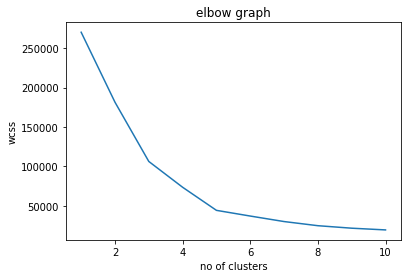

In [8]:
#elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.title('elbow graph')


In [9]:
# Fitting K-Means to the dataset
Kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
Kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [10]:
#Find the clusters
y_means=Kmeans.fit_predict(x)
print(y_means)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [16]:
# It predicts the cluster number to which the datapoint belongs to
import numpy as np
test=Kmeans.predict(np.asarray([[3,3]]))
test[0]

2

In [25]:
# Looking at the points which belong to Cluster 0
x[y_means==0]

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
50,42,52
51,42,60
52,43,54
53,43,60
54,43,45


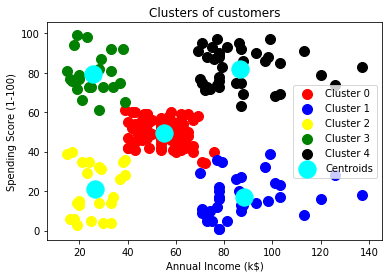

In [24]:
# Visualising the clusters
plt.scatter(x[y_means == 0]['Annual Income (k$)'], x[y_means == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(x[y_means==1]['Annual Income (k$)'],x[y_means==1]['Spending Score (1-100)'],s=100,c='blue',label='Cluster 1')
plt.scatter(x[y_means==2]['Annual Income (k$)'],x[y_means==2]['Spending Score (1-100)'],s=100,c='yellow',label='Cluster 2')
plt.scatter(x[y_means==3]['Annual Income (k$)'],x[y_means==3]['Spending Score (1-100)'],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_means==4]['Annual Income (k$)'],x[y_means==4]['Spending Score (1-100)'],s=100,c='black',label='Cluster 4')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s = 300, c = 'cyan', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()